In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('EURUSD_D1.csv', index_col=['date'], parse_dates=['date'], dayfirst=True) #forex.csv
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2014-12-26,1.22075,1.22218,1.21686,1.21777,46525
2014-12-28,1.21792,1.21804,1.21672,1.21682,5836
2014-12-29,1.21682,1.22210,1.21429,1.21533,95531
2014-12-30,1.21535,1.21873,1.21239,1.21613,106543
2014-12-31,1.21613,1.21697,1.20968,1.20976,73334
...,...,...,...,...,...
2021-05-14,1.20768,1.21477,1.20708,1.21420,97541
2021-05-16,1.21450,1.21511,1.21368,1.21498,2803
2021-05-17,1.21497,1.21687,1.21259,1.21563,81158


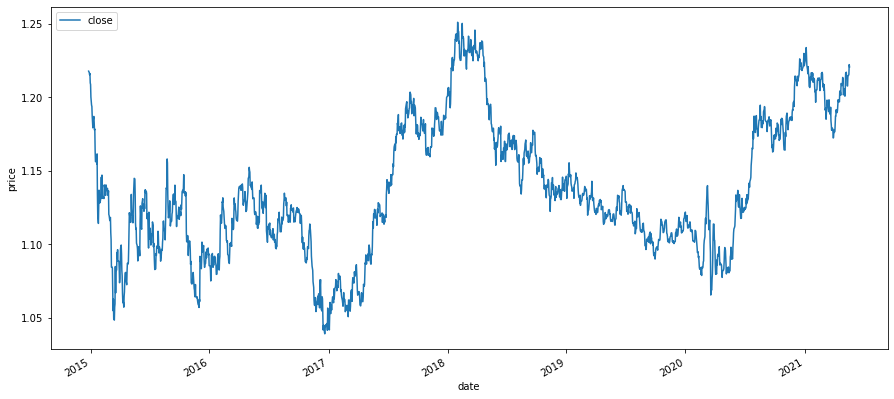

In [3]:
plt.figure(figsize(15,7))
df.close.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

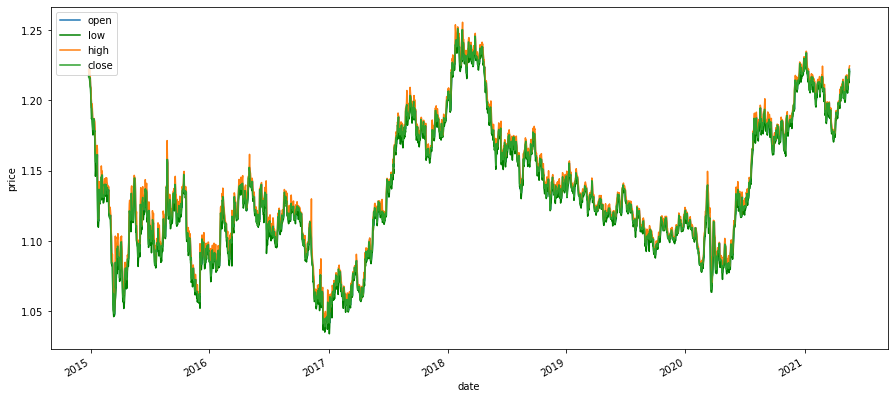

In [4]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
df.close.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

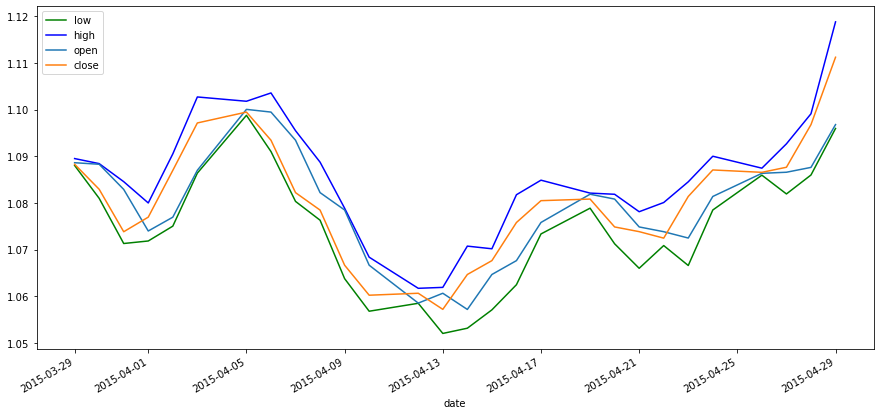

In [5]:
plt.figure(figsize(15,7))
df.loc['2015-03-29':'2015-04-29'].low.plot(color='g')
df.loc['2015-03-29':'2015-04-29'].high.plot(color='b')
df.loc['2015-03-29':'2015-04-29'].open.plot()
df.loc['2015-03-29':'2015-04-29'].close.plot()
plt.legend(loc='upper left')

In [6]:
df.drop(columns=['open', 'high', 'low', 'volume'],inplace=True)
df.head()

,close
date,
2014-12-26,1.21777
2014-12-28,1.21682
2014-12-29,1.21533
2014-12-30,1.21613
2014-12-31,1.20976


## анализ ряда

In [7]:
'''
df2 = pd.DataFrame(index=df.index[0:6])#, index_col=['date']) #, parse_dates=['date'])
df2['open']=df['open']
df2
'''

"\ndf2 = pd.DataFrame(index=df.index[0:6])#, index_col=['date']) #, parse_dates=['date'])\ndf2['open']=df['open']\ndf2\n"

Критерий Дики-Фуллера: p=0.110080


<Figure size 1080x720 with 0 Axes>

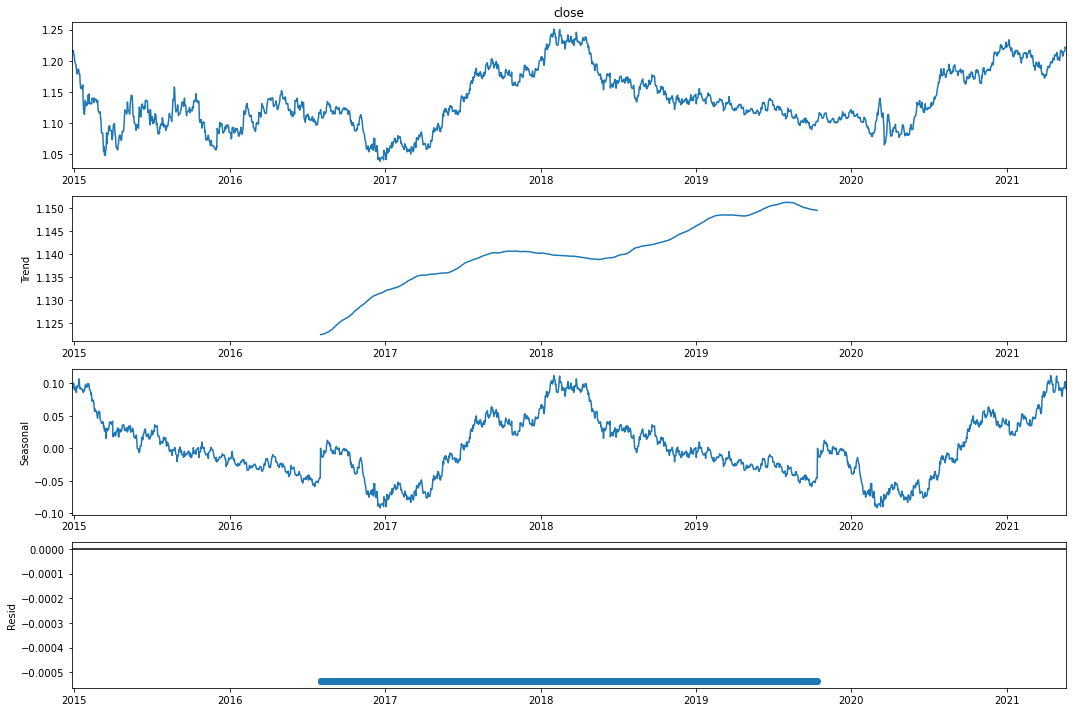

In [8]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df.close,  period = 1000).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.close)[1])

# Бокс-Кокс

Оптимальный параметр преобразования Бокса-Кокса: -3.312143
Критерий Дики-Фуллера: p=0.165708


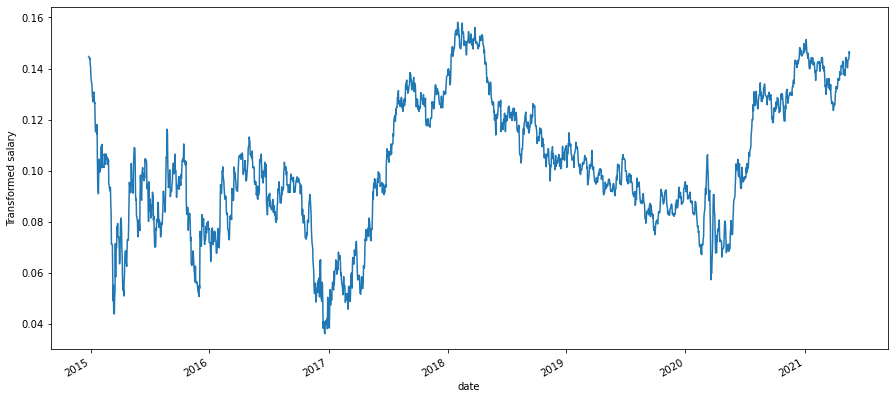

In [9]:
df['close'], lmbda = stats.boxcox(df['close'])
plt.figure(figsize(15,7))
df['close'].plot()
plt.ylabel(u'Transformed salary')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df)[1])

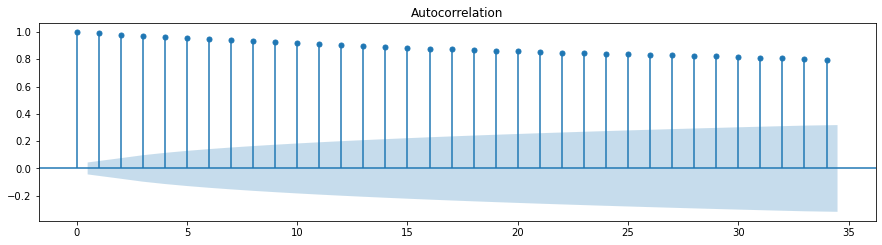

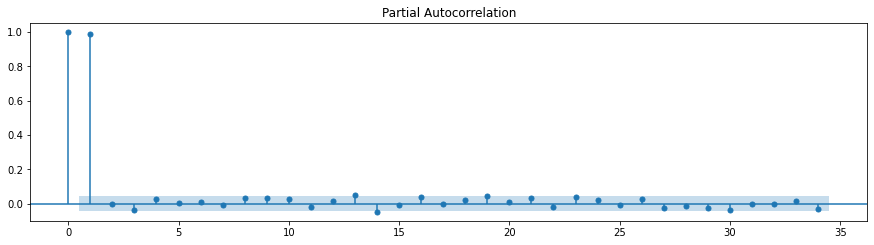

In [10]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['close'].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['close'].values.squeeze(), ax=ax)
pylab.show()

### Диффиренцирование

In [11]:
'''
df['data_diff12'] = df.close - df.close.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff12'][12:],period = 1018).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff12'][12:])[1])
'''

'\ndf[\'data_diff12\'] = df.close - df.close.shift(12)\nplt.figure(figsize(15,10))\nsm.tsa.seasonal_decompose(df[\'data_diff12\'][12:],period = 1018).plot()\nprint("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df[\'data_diff12\'][12:])[1])\n'

243 - 243
510 - 267
769 - 259
1030 - 261
1293 - 263
1557 - 264
1819 - 262
shift in a year between 20xx.03.29 (df starting date)

## на единичку

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

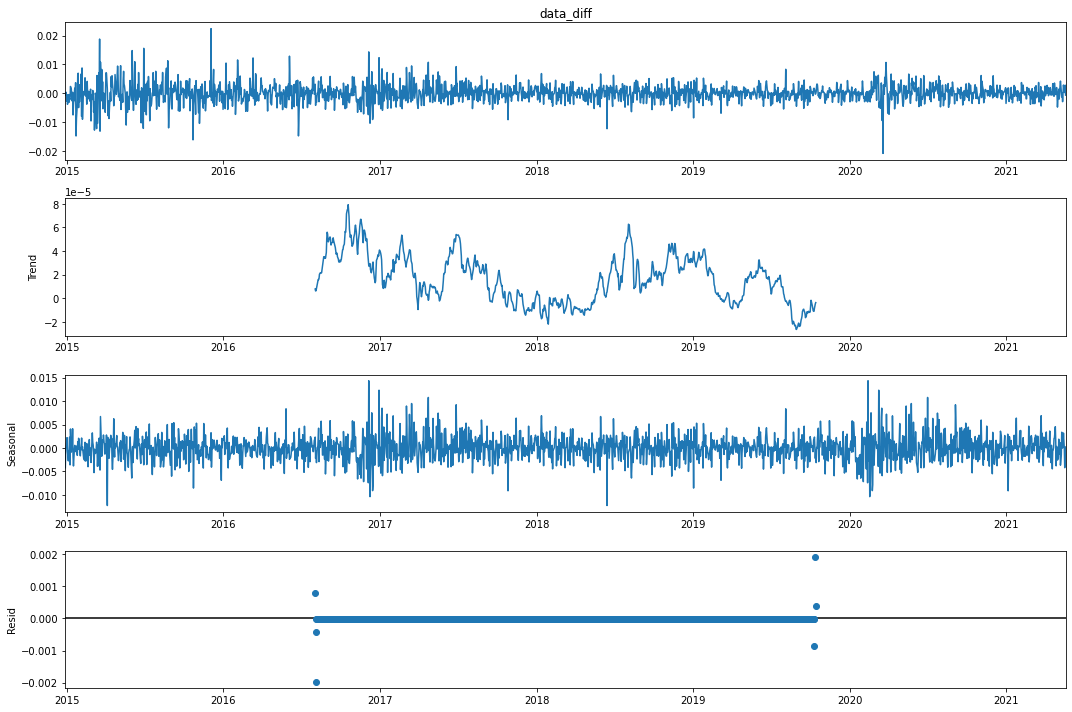

In [12]:
df['data_diff'] = df['close'] - df['close'].shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff'][1:],period = 998).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff'][1:])[1])

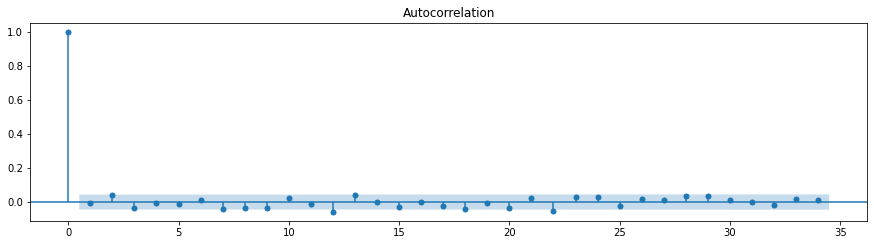

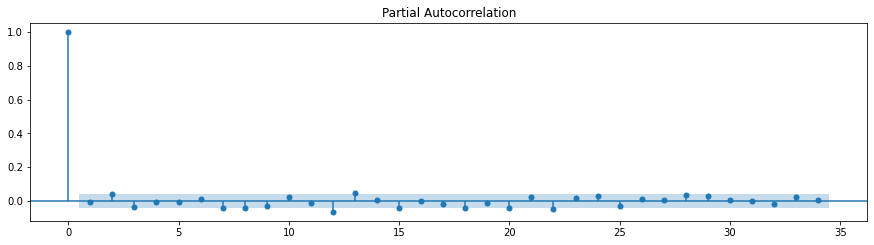

In [13]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff'][1:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff'][1:].values.squeeze(), ax=ax)
pylab.show()

## На неделю

In [14]:
(267+259+261+263*3)/6

262.6666666666667

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

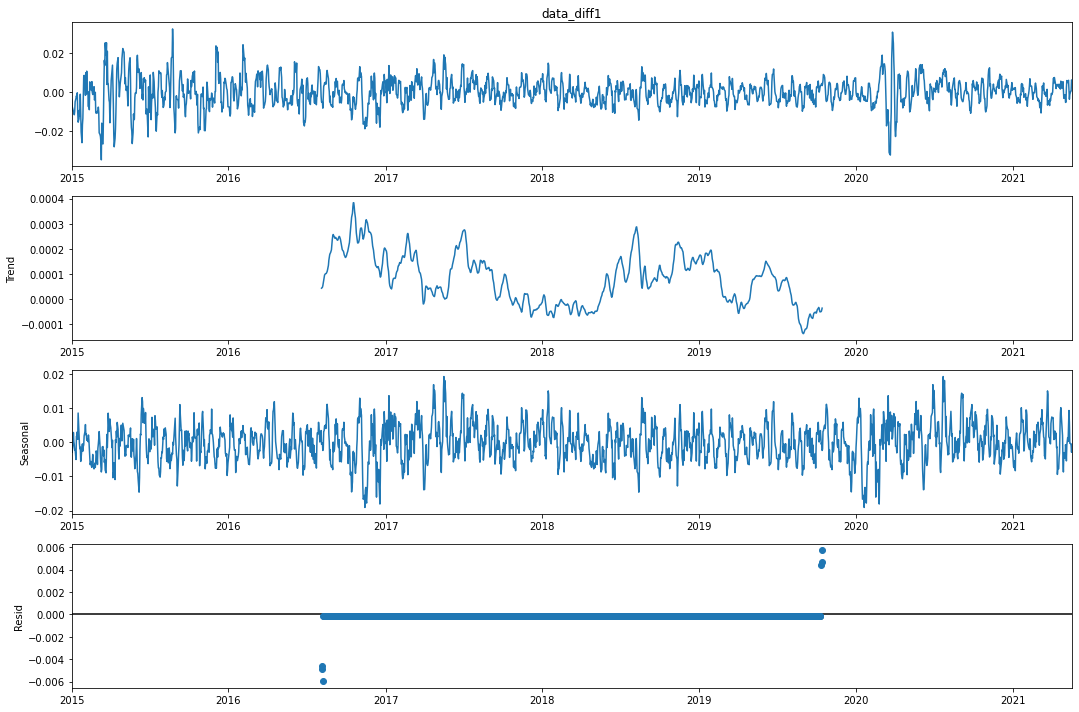

In [15]:
df['data_diff1'] = df['close'] - df['close'].shift(5)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff1'][5:],period = 996).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff1'][13:])[1])

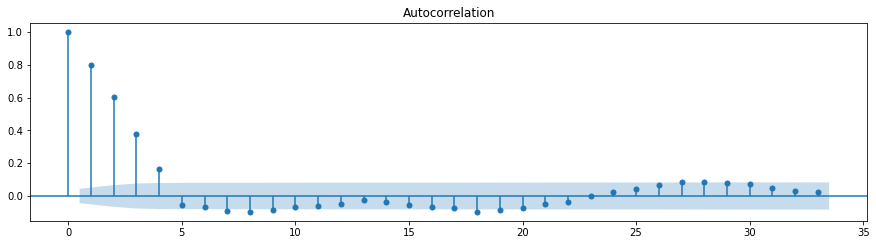

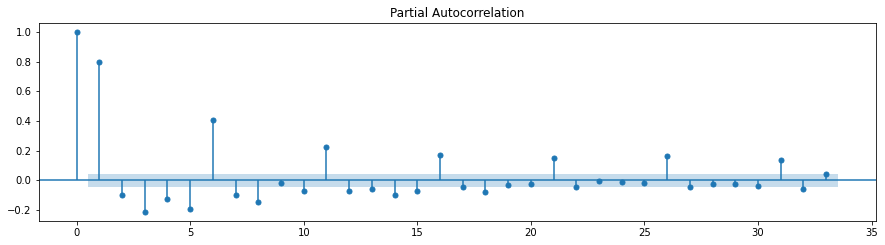

In [16]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff1'][5:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff1'][5:].values.squeeze(), ax=ax)
pylab.show()

In [17]:
#df.loc['2012-04-29':'2012-05-20']

## На месяц

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

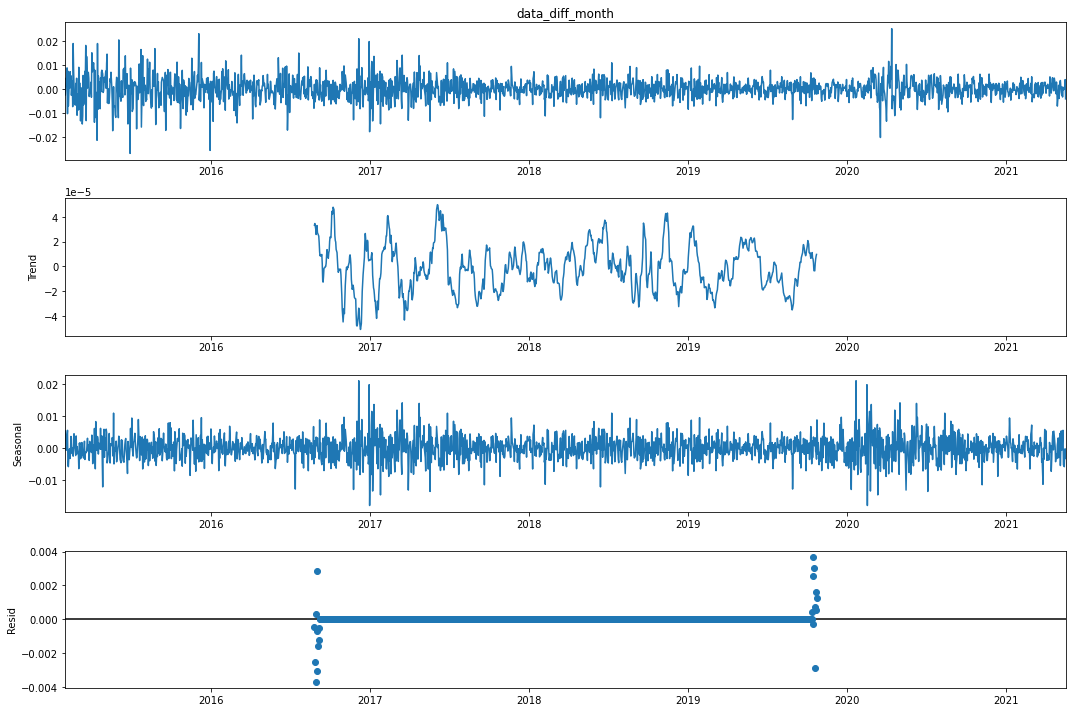

In [18]:
df['data_diff_month'] = df['data_diff'] - df['data_diff'].shift(22)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff_month'][30:],period = 980).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff_month'][30:])[1])

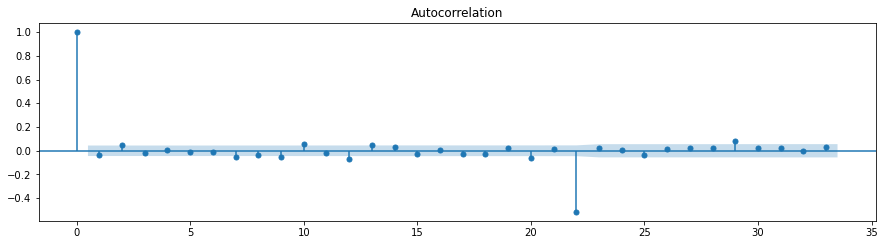

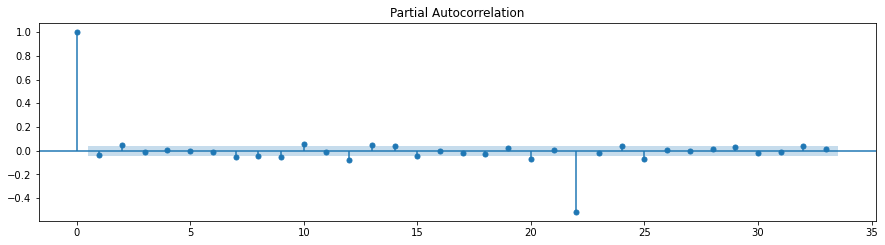

In [19]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff_month'][30:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff_month'][30:].values.squeeze(), ax=ax)
pylab.show()

In [20]:
#df.loc['2011-04-20':'2011-05-05']

## На год

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

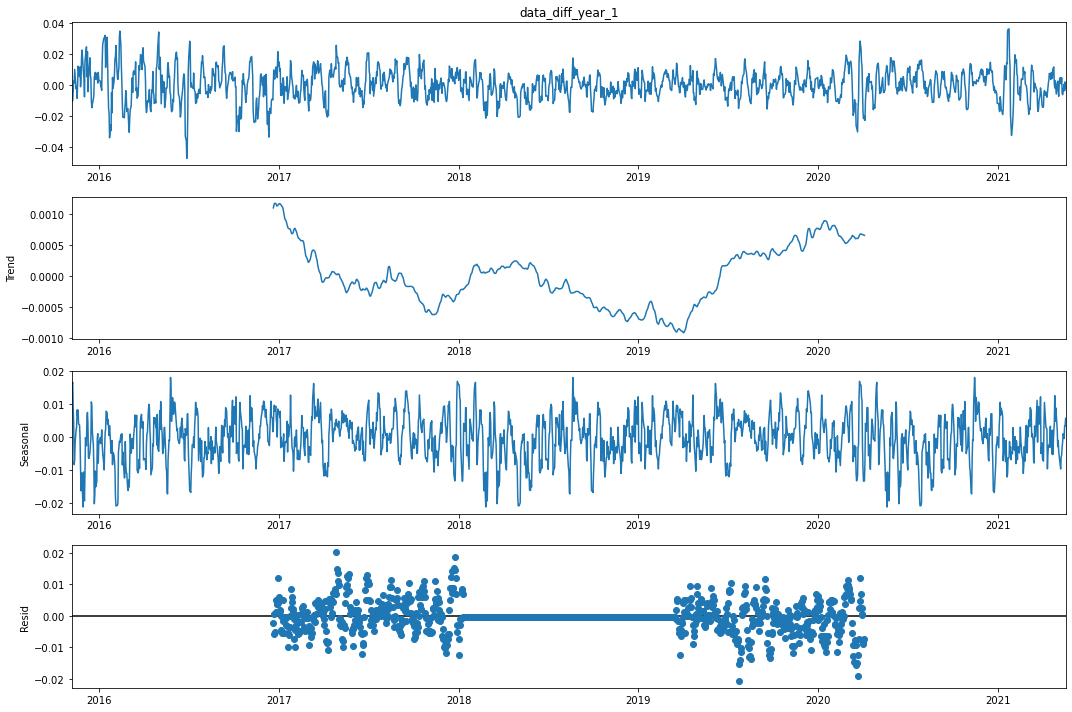

In [22]:
df['data_diff_year_1'] = df['data_diff1'] - df['data_diff1'].shift(263)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff_year_1'][270:],period = 700).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff_year_1'][270:])[1])

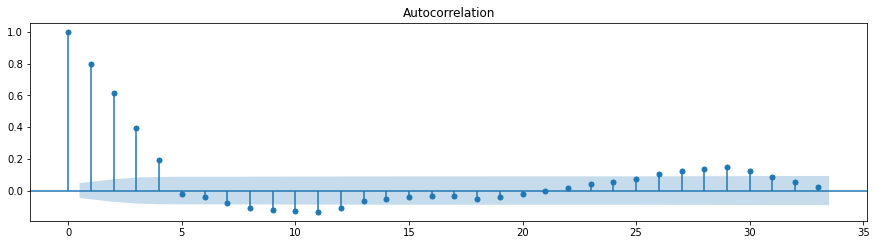

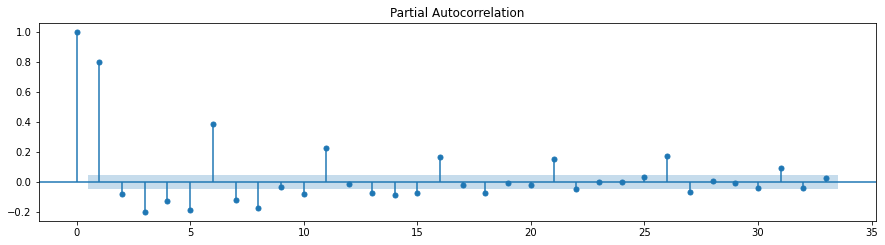

In [23]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff_year_1'][270:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff_year_1'][270:].values.squeeze(), ax=ax)
pylab.show()

## Год с месяцем

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

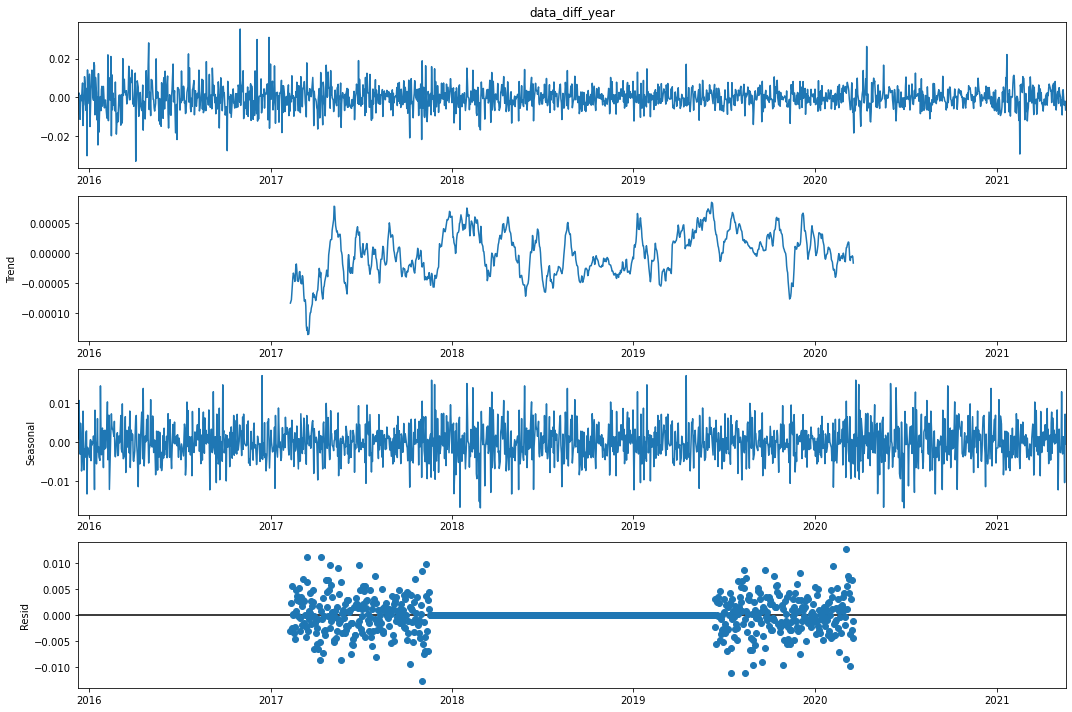

In [24]:
df['data_diff_year'] = df['data_diff_month'] - df['data_diff_month'].shift(263)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df['data_diff_year'][300:],period = 730).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff_year'][300:])[1])

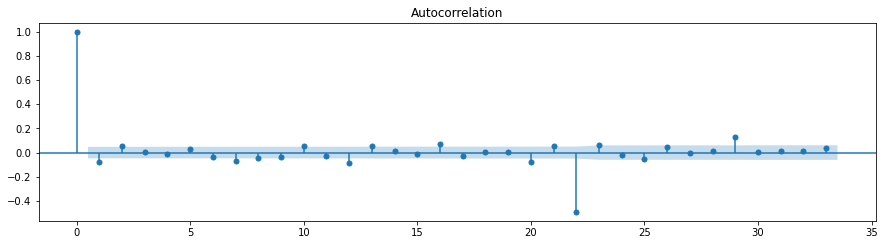

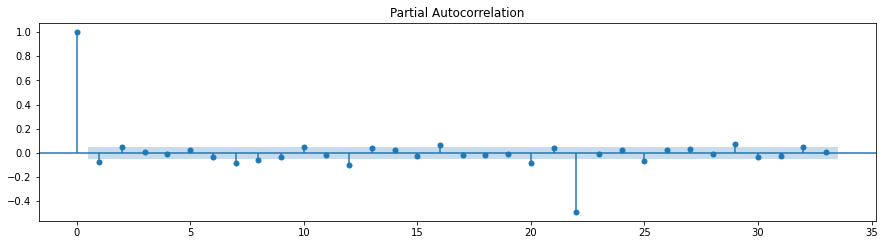

In [25]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['data_diff_year'][300:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['data_diff_year'][300:].values.squeeze(), ax=ax)
pylab.show()

# Saving Early

In [ ]:
data = pd.DataFrame(data={'close' : df['data_diff_month'][30:]},
                   index=df.index[30:])
data.head()

In [ ]:
plt.figure(figsize(15,7))
data['close'].plot() 
plt.ylabel('close')
pylab.show()

In [ ]:
#data.to_csv('data_Arima_23_05.csv')